Linear Regression Model can be train in two different forms.

- Using a direct "closed-form" equation that directly computes the model parameters that best fit the model to the training set.

- Using an iterative optimization approach, Gradient Descent, that gradually tweaks the model parameters to minimize the cost function over the training set.


Polynomial Regression is a more complex model that can fit non-linear dataset. It is more prone to overfitting the training data.

## The Normal Equation

In [69]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [70]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

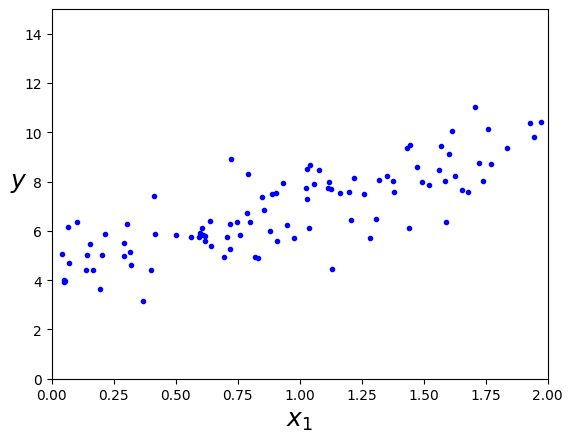

In [71]:
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Concatenating the ones matrix with features to operate matrix multiplication i.e. for simplicity. It's like multiplying the constant term or y-intercept with 1. 

In [72]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best has two rows as we are dealing with single independent variable. The rows in theta_best = Independent Variable + 1.

First row has the value of constant term or y-intercept or bias term and the second row has the value of slope or weight which is multiplied to feature.

In [73]:
print(theta_best)

[[4.40131368]
 [2.60662707]]


Now, the X_new is the features which we need to predict. We again need to concatenate to match with training sets. We are having a matrix multiplication of X_new_b with theta_best getting the values of y.

In [74]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[4.40131368]
 [9.61456782]]


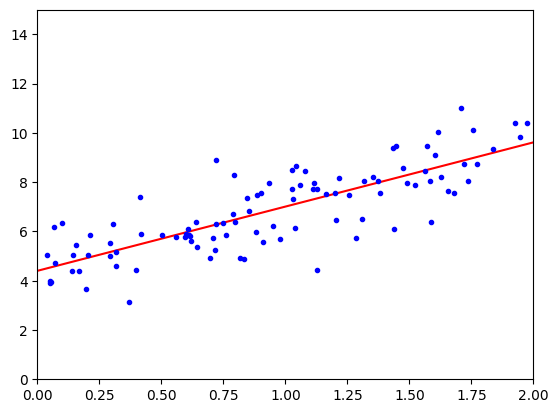

In [76]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Equivalent code using Scikit-learn

In [77]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.40131368]), array([[2.60662707]]))

In [78]:
lin_reg.predict(X_new)

array([[4.40131368],
       [9.61456782]])

## Gradient Descent
It tweaks parameters iteratively in order to minimize a cost function by measuring the local gradient of the error function with regards to the parameter vector theta, and it goes in the direction of descending gradient, until the gradient is zero.

If the learning rate is too small, then the algorithm will take a long time as it will go through many iterations to converge.

If the learning rate is too high, it might jump across the valley and end up on the other side, possibily even higher up.

When using Gradient Descent, we should ensure that all features have a similar scale (by using StandardScaler class), or else it will take much longer to converge.

## Batch Gradient Descent
It uses the whole training set to compute the gradients at every step. It is much faster using Gradient Descent than using the Normal Equation while there are huge number of features.

In [82]:
eta = 0.1 # learning-rate
n_iterations = 1000
m = 100 # number of training data. It helps to make update step size independent of dataset size.

theta= np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

In [80]:
print(theta)

[[4.40131368]
 [2.60662707]]


To find a good learning rate, we can use Grid Search.


## Stochastic Gradient Descent
It just picks a random instance in the training set at every step and computes the gradients based only on that single instance making it much more faster than BGD. But, it is less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, thus the final parameter values are good but not optimal.

Also, this irregularity helps the algorithm to jump out of local minima and find out global minima than Batch Gradient Descent.

We can gradually reduce learning rate to jump out of local minima and to find out the optimal solution. This process is called Simulated Annealing.

In [86]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients

In [87]:
print(theta)

[[4.37921392]
 [2.64404593]]


Implementing in Sk-learn

In [92]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [93]:
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.3802093] [2.62437005]


## Mini-Batch Gradient Descent
It computes the gradients on small random sets of instances called mini-batches. 

## Polynomial Regression
It add powers of each feature as new features, then train a linear model on this extended set of features.

In [94]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X **2 + X + 2 + np.random.rand(m, 1)

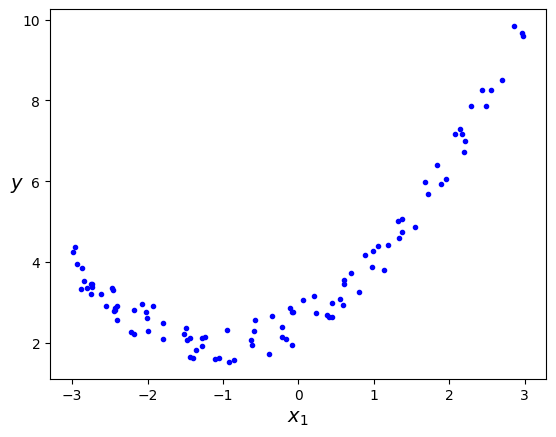

In [98]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', rotation=0, fontsize=14)
plt.show()

We need to tranform our training data by adding the squ

In [100]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.79983081])

In [101]:
X_poly[0]

array([0.79983081, 0.63972933])

In [102]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[2.49899682] [[1.01966689 0.49635731]]


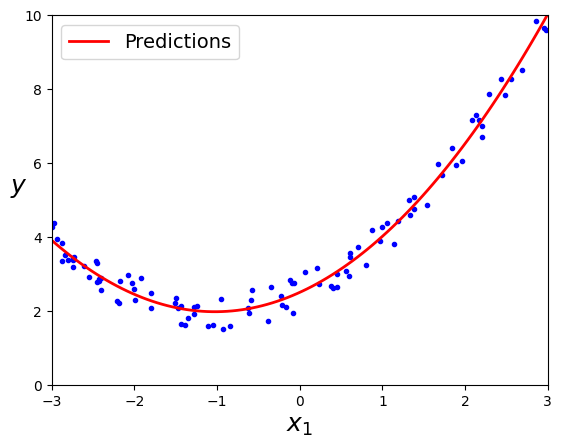

In [104]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()